In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# Load the dataset
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')   

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train[['Survived', 'Pclass', 'Sex']]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]
train = strat_train_set.copy()

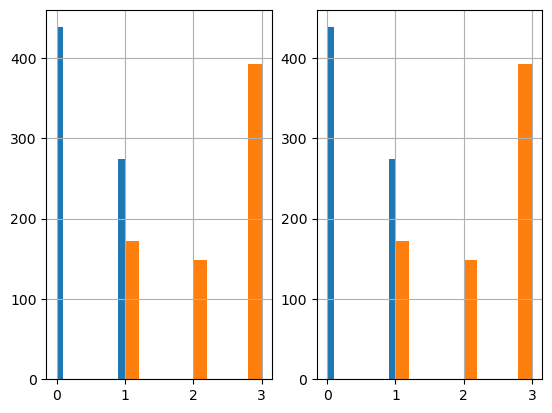

In [29]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.show()

In [30]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          565 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.imputer = SimpleImputer(strategy=self.strategy)

    def fit(self, X, y=None):
        self.imputer.fit(X[['Age']])
        return self

    def transform(self, X):
        X['Age'] = self.imputer.transform(X[['Age']])
        return X

In [37]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features=None):
        self.categorical_features = categorical_features
        self.encoder = OneHotEncoder(drop='first')

    def fit(self, X, y=None):
        if self.categorical_features:
            self.encoder.fit(X[self.categorical_features])
        return self

    def transform(self, X):
        if self.categorical_features:
            encoded_features = self.encoder.transform(X[self.categorical_features])
            return np.concatenate([X.drop(columns=self.categorical_features).values, encoded_features], axis=1)
        return X.values

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop, axis=1)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = ['Age', 'Fare']
cat_features = ['Pclass']

dropper = DropColumns(columns_to_drop=['Name', 'Sex', 'Cabin', 'Embarked', 'N'])

numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', OneHotEncoder(), cat_features)
])

full_pipeline = Pipeline([
    ('drop_columns', dropper),
    ('preprocessing', preprocessor)
])

X_train_transformed = full_pipeline.fit_transform(X_train)

KeyError: "['Name', 'Cabin', 'N'] not found in axis"

In [41]:
from sklearn.pipeline import Pipeline

Pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    ('feature_encoder', FeatureEncoder()),
    ('feature_dropper', Featuredropper()),
    ('scaler', StandardScaler())
])
X_train = strat_train_set.drop('Survived', axis=1)
y_train = strat_train_set['Survived']
X_test = strat_test_set.drop('Survived', axis=1)
y_test = strat_test_set['Survived']

X_train = Pipeline.fit_transform(X_train)
X_test = Pipeline.transform(X_test)
X_train.shape, X_test.shape
X_train[:5], X_test[:5]
X_train[:5], X_test[:5]
X_train[:5], X_test[:5]     

AttributeError: 'numpy.ndarray' object has no attribute 'drop'